# Separation of Previous Code into Environment and Agent Codes

done


<IPython.core.display.Javascript object>


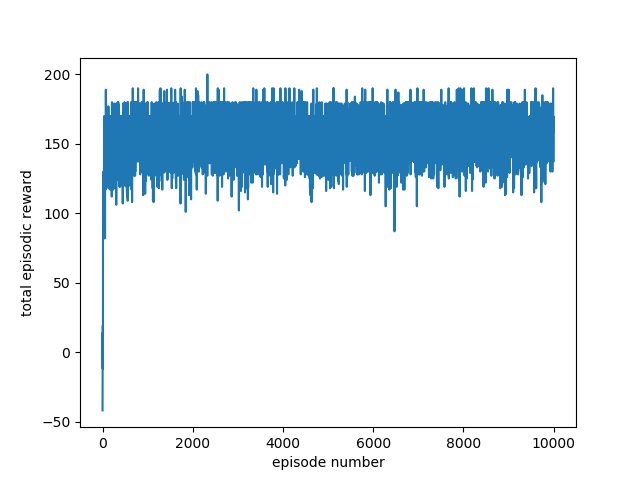

reward model
[[ 0. 10.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Q function for up action
[[17.93818973 22.56527737 18.14832677 16.88822038  5.85095724]
 [17.58974062 20.26183902 17.10503895 15.39840513  1.58429612]
 [16.23670676 18.13904858 16.07414945 13.96994693  0.2970494 ]
 [14.41789026 15.99091863 14.08018632 11.38100216  3.92231796]
 [12.7370924  14.03861064 12.29223123  8.23828536  9.46120012]]
Q function for down action
[[16.15441118 22.54694863 16.69293325 16.64156316  0.56553472]
 [14.62869727 16.12525762 14.54448157 12.87798222  4.44925178]
 [13.22512276 14.53955141 12.78475712 11.16485704 10.2271623 ]
 [11.72487233 12.86595535 11.29597203  8.86404076  3.34219445]
 [11.49426537 12.5816474  11.15014036  3.52267305  0.38642875]]
Q function for left action
[[18.11743827 22.55616866 19.97200533 15.98873757  0.31949215]
 [16.30602855 16.13109521 18.12223958 15.7289477  13.84264041]
 [14.38195003 14.6608117  14.99998

<IPython.core.display.Javascript object>


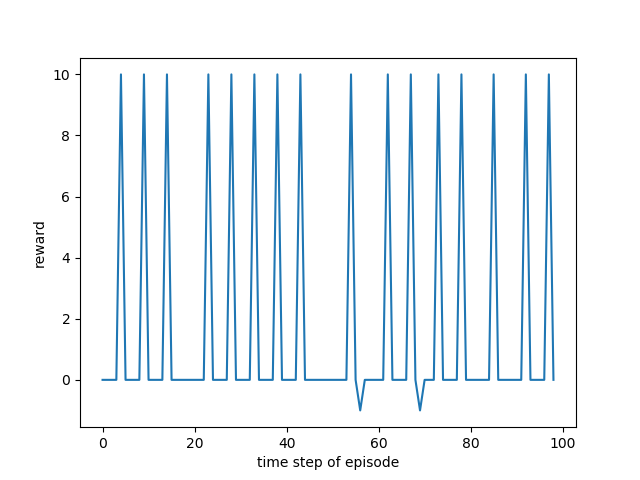

<IPython.core.display.Javascript object>


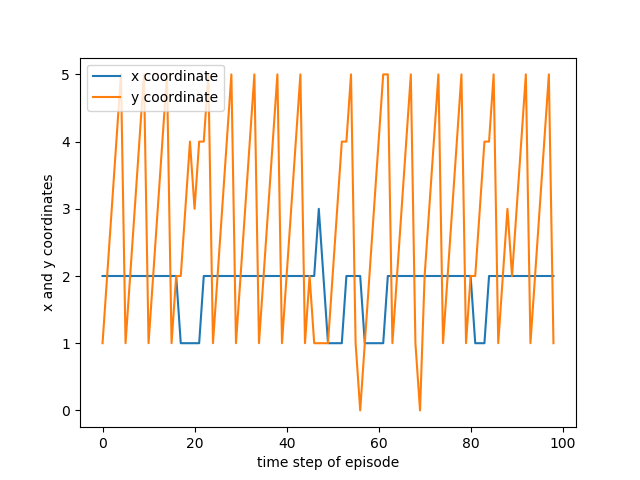

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[4 1 3 4 1]
 [4 1 3 3 3]
 [1 1 1 1 2]
 [1 1 1 3 3]
 [1 1 3 3 1]]


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent.qLearning(world,'')#'render' with quotes to show environment
agent.work()

## Before Using PyTorch
The neural network model uses array-style inputs and outputs, so I have to change my Q function from it's original form in Q_Learning_Agent to an arrayed form in Q_Learning_Agent_Arrayed.

done


<IPython.core.display.Javascript object>


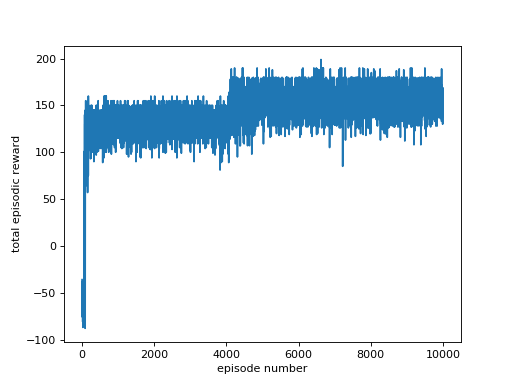

reward model
[[ 0. 10.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
Q function for up action
[[ 1.29894589 21.33434472  0.92546909 17.48331897  0.59766134]
 [14.5546259  18.74002923 16.81912706 15.69897249 13.4705209 ]
 [14.83068889 16.97863613 14.82620395 13.25025418 12.0622982 ]
 [10.61858414 14.95915353 13.60724014 12.33297779  9.25540478]
 [ 9.910587   12.6731933  12.22767291  6.79460981  9.24891056]]
Q function for down action
[[14.23858804 21.32479374 15.3588036  17.36185472 11.05572729]
 [13.4544281  15.40970169 14.13927861 12.56651324 10.13668351]
 [12.11654686 13.76757448 12.58849091 10.96144231  9.52069255]
 [ 8.96001051 11.83371667 11.39948796  9.33479176  7.58245689]
 [ 2.13783164  1.17108454  0.82827581  2.3224124   0.55861068]]
Q function for left action
[[ 0.2530937  21.33419219 18.98662471 17.36173995 14.40854398]
 [ 0.48713533 15.14283122 16.50943365 14.99757381 12.3264947 ]
 [ 1.79704441 13.35736052 15.10419

<IPython.core.display.Javascript object>


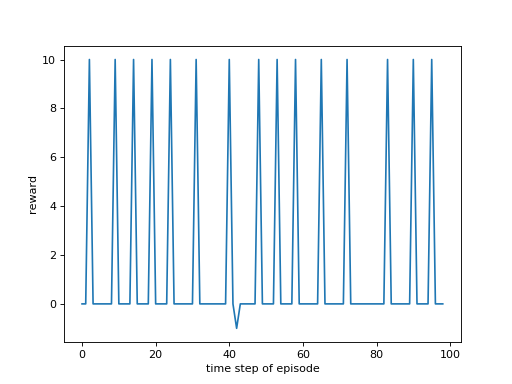

<IPython.core.display.Javascript object>


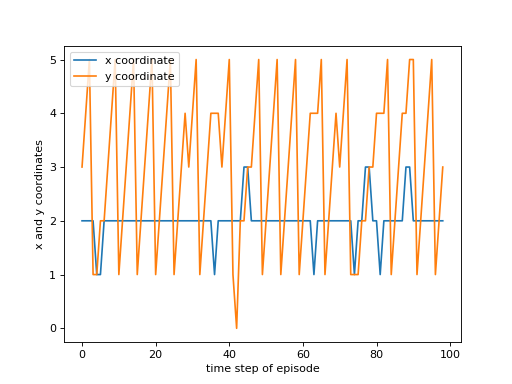

Exploit policy of agent, where: 1 is up, 2 is down, 3 is left and 4 is right
[[4 3 3 1 3]
 [4 1 1 1 1]
 [1 1 3 3 1]
 [4 1 1 1 3]
 [4 1 1 3 1]]


In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env, Q_Learning_Agent_Arrayed

world = Gridworld_Env.gridworld()
agent = Q_Learning_Agent_Arrayed.qLearning(world,'')#'render' with quotes to show environment
agent.work()

# Getting Used to PyTorch
The below code seems to work, now making it into a class file. Code from https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

However, upon biasing the output deterministically, we see that the learning algorithm is not stable in its performance. However, the perfomance is stable 

In [6]:
# -*- coding: utf-8 -*-
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 10, 1, 100, 4

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
#xx = torch.randn(D_in,1)
y = torch.randn(N, D_out)*10
#y[0] = torch.tensor([0,10,0,5])

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H+100, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(H+100, H, bias=True),
#    torch.nn.ReLU(),
#    torch.nn.Linear(H+50, H, bias=True),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

loss_fn = torch.nn.MSELoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(2000):
    y_pred = model(x)#prediction step is called forward pass
    
#    print(y_pred)
    
    loss = loss_fn(y_pred, y)#loss calculation for feedback
    print(t, loss.item())

    optimizer.zero_grad()
    
    loss.backward()#gradient of loss step is called backward pass
    optimizer.step()

0 86.4277114868164
1 86.0613784790039
2 85.74368286132812
3 85.43184661865234
4 85.11045837402344
5 84.772216796875
6 84.3926010131836
7 83.97081756591797
8 83.51061248779297
9 83.00732421875
10 82.46470642089844
11 81.87348175048828
12 81.2281494140625
13 80.53443145751953
14 79.79547119140625
15 79.01532745361328
16 78.19712829589844
17 77.34839630126953
18 76.47174835205078
19 75.57769775390625
20 74.6790542602539
21 73.78564453125
22 72.9079360961914
23 72.05399322509766
24 71.23480987548828
25 70.45315551757812
26 69.71952819824219
27 69.0461654663086
28 68.4395751953125
29 67.90757751464844
30 67.44812774658203
31 67.06519317626953
32 66.7501449584961
33 66.50226593017578
34 66.31925201416016
35 66.16850280761719
36 66.01637268066406
37 65.85560607910156
38 65.67923736572266
39 65.50511169433594
40 65.33377838134766
41 65.15892791748047
42 64.99211883544922
43 64.83226013183594
44 64.67540740966797
45 64.51710510253906
46 64.35726928710938
47 64.18781280517578
48 64.0148239135742

385 11.84595012664795
386 11.765820503234863
387 11.711369514465332
388 11.634899139404297
389 11.588075637817383
390 11.531630516052246
391 11.493185997009277
392 11.424921989440918
393 11.373536109924316
394 11.313203811645508
395 11.288846015930176
396 11.198480606079102
397 11.170149803161621
398 11.10312557220459
399 11.09988784790039
400 11.024188995361328
401 11.005919456481934
402 10.959135055541992
403 10.895748138427734
404 10.87639045715332
405 10.810449600219727
406 10.776237487792969
407 10.726838111877441
408 10.700732231140137
409 10.666707038879395
410 10.62597942352295
411 10.586771011352539
412 10.542855262756348
413 10.507142066955566
414 10.46940803527832
415 10.459549903869629
416 10.422163963317871
417 10.382486343383789
418 10.346938133239746
419 10.311707496643066
420 10.299571990966797
421 10.283234596252441
422 10.238214492797852
423 10.218976974487305
424 10.200787544250488
425 10.17868423461914
426 10.136000633239746
427 10.099851608276367
428 10.08232688903

801 1.1087099313735962
802 1.0938713550567627
803 1.080445408821106
804 1.0679627656936646
805 1.0562920570373535
806 1.0463695526123047
807 1.0366430282592773
808 1.022858738899231
809 1.0146384239196777
810 1.0053255558013916
811 0.9945189952850342
812 0.9863175749778748
813 0.9782956838607788
814 0.9699352383613586
815 0.9632081985473633
816 0.9575473070144653
817 0.9527660608291626
818 0.9425642490386963
819 0.9359384179115295
820 0.9288060665130615
821 0.9216164946556091
822 0.9145428538322449
823 0.907919704914093
824 0.9022404551506042
825 0.8937148451805115
826 0.8874281048774719
827 0.8815807104110718
828 0.8787882924079895
829 0.874822199344635
830 0.8726450800895691
831 0.8773267269134521
832 0.8901733160018921
833 0.9204967021942139
834 0.9738302826881409
835 1.058353066444397
836 1.1369236707687378
837 1.1447347402572632
838 1.0482022762298584
839 0.8922545909881592
840 0.8123108148574829
841 0.8631459474563599
842 0.9399937987327576
843 0.9337880611419678
844 0.8503549695

1163 0.03374375030398369
1164 0.03424516320228577
1165 0.03501918911933899
1166 0.036084599792957306
1167 0.037943482398986816
1168 0.040265340358018875
1169 0.04239259287714958
1170 0.04462429881095886
1171 0.04667378589510918
1172 0.048126112669706345
1173 0.04841985926032066
1174 0.04801669716835022
1175 0.0462212897837162
1176 0.0432288683950901
1177 0.039130039513111115
1178 0.034460555762052536
1179 0.029874278232455254
1180 0.026221271604299545
1181 0.023437906056642532
1182 0.02171163819730282
1183 0.021023157984018326
1184 0.021116558462381363
1185 0.021716512739658356
1186 0.02256188541650772
1187 0.023844195529818535
1188 0.025782737880945206
1189 0.02808925323188305
1190 0.03070986457169056
1191 0.03349956497550011
1192 0.03631092235445976
1193 0.039198074489831924
1194 0.0417666882276535
1195 0.04506367817521095
1196 0.04716979339718819
1197 0.048146139830350876
1198 0.04767509177327156
1199 0.0454985648393631
1200 0.04150480777025223
1201 0.03591497614979744
1202 0.030362

1493 0.014030398800969124
1494 0.01321770902723074
1495 0.011586873792111874
1496 0.009420675225555897
1497 0.006994478404521942
1498 0.004627518355846405
1499 0.002643322804942727
1500 0.0012350702891126275
1501 0.0004721099103335291
1502 0.0002957249525934458
1503 0.0005700389156118035
1504 0.0011469682212918997
1505 0.0018816972151398659
1506 0.0026634137611836195
1507 0.003412662073969841
1508 0.004088454879820347
1509 0.004740727599710226
1510 0.005316718015819788
1511 0.005865618120878935
1512 0.006289719138294458
1513 0.006684788968414068
1514 0.00688216183334589
1515 0.0069884685799479485
1516 0.0070656375028193
1517 0.006962431129068136
1518 0.006859963294118643
1519 0.006557058542966843
1520 0.006135412957519293
1521 0.005563745275139809
1522 0.004896129481494427
1523 0.004192736465483904
1524 0.0035196312237530947
1525 0.0029026628471910954
1526 0.002367454580962658
1527 0.0019191985484212637
1528 0.0015769953606650233
1529 0.001319929026067257
1530 0.0011428524740040302
153

1859 0.00017396363546140492
1860 0.00021643434592988342
1861 0.0002889521711040288
1862 0.0003848417545668781
1863 0.0004960242076776922
1864 0.0005869412561878562
1865 0.0006260923109948635
1866 0.0005988011253066361
1867 0.0005117340479046106
1868 0.0003917971334885806
1869 0.0002704485086724162
1870 0.00017230311641469598
1871 0.00010613803169690073
1872 6.808187754359096e-05
1873 4.805228309123777e-05
1874 3.73316761397291e-05
1875 3.1621402740711346e-05
1876 3.2078711228678e-05
1877 4.114205876248889e-05
1878 5.952500941930339e-05
1879 8.497910312144086e-05
1880 0.00011309683759463951
1881 0.00013893694267608225
1882 0.00015903028543107212
1883 0.0001725947658997029
1884 0.0001811667316360399
1885 0.00018777638615574688
1886 0.00019542504742275923
1887 0.00020607426995411515
1888 0.00022041803458705544
1889 0.0002383373212069273
1890 0.000259963097050786
1891 0.00028518118779174984
1892 0.0003153794095851481
1893 0.00035252596717327833
1894 0.0004051166179124266
1895 0.00047266742

## Making it a class implementation

In [1]:
# -*- coding: utf-8 -*-
import torch
class test(object):
    def __init__(self):
        
    
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
        self.N, self.D_in, self.H, self.D_out = 10, 1, 100, 4

# Create random Tensors to hold inputs and outputs
        self.x = torch.randn(self.N, self.D_in)
        self.y = torch.randn(self.N, self.D_out)*10

        self.model = torch.nn.Sequential(
            torch.nn.Linear(self.D_in, self.H),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H, self.H+100, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H+100, self.H, bias=True),
            torch.nn.ReLU(),
            torch.nn.Linear(self.H, self.D_out),
)

        self.loss_fn = torch.nn.MSELoss()

        self.learning_rate = 1e-3
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        pass
    def predict(self,x):
        self.y_pred = self.model(x)
        return self.y_pred
    def update(self,t):
            self.loss = self.loss_fn(self.y_pred, self.y)#loss calculation for feedback

            self.optimizer.zero_grad()
        
            self.loss.backward()#gradient of loss step is called backward pass
            self.optimizer.step()
            return print(t, self.loss.item())
    def work(self):
        for t in range(2000):
            #y_pred = model(x)#prediction step is called forward pass
            self.y_pred = self.predict(self.x)
            self.update(t)
#            print(self.y_pred)
#            print(self.y)
            print(list(self.model.parameters())[0].grad)
            pass
    
testy = test()
testy.work()

0 86.75277709960938
tensor([[ 0.0008],
        [ 0.0012],
        [-0.0044],
        [-0.0064],
        [ 0.0000],
        [-0.0101],
        [-0.0204],
        [-0.0022],
        [-0.0111],
        [-0.0001],
        [ 0.0000],
        [ 0.0067],
        [-0.0110],
        [ 0.0047],
        [ 0.0000],
        [-0.0006],
        [ 0.0019],
        [ 0.0000],
        [-0.0044],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0094],
        [-0.0042],
        [ 0.0000],
        [-0.0060],
        [ 0.0000],
        [ 0.0000],
        [-0.0059],
        [-0.0020],
        [ 0.0000],
        [ 0.0000],
        [-0.0034],
        [ 0.0067],
        [ 0.0143],
        [ 0.0000],
        [-0.0003],
        [ 0.0000],
        [ 0.0006],
        [ 0.0219],
        [ 0.0018],
        [ 0.0043],
        [ 0.0000],
        [ 0.0093],
        [-0.0035],
        [-0.0217],
        [ 0.0000],
        [ 0.0173],
        [ 0.0016],
        [ 0

tensor([[-0.1227],
        [ 0.1130],
        [ 0.1142],
        [ 0.0510],
        [ 0.0000],
        [ 0.1608],
        [ 0.1637],
        [ 0.0169],
        [ 0.0526],
        [-0.2037],
        [ 0.0000],
        [ 0.1416],
        [ 0.0494],
        [ 0.0997],
        [ 0.0000],
        [ 0.0861],
        [-0.0824],
        [ 0.0000],
        [-0.0370],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0684],
        [ 0.1176],
        [ 0.0000],
        [ 0.0974],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1972],
        [ 0.0000],
        [ 0.0000],
        [-0.1248],
        [ 0.1220],
        [ 0.0839],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0884],
        [ 0.0401],
        [ 0.0771],
        [-0.0920],
        [ 0.0000],
        [-0.0170],
        [-0.0795],
        [-0.0502],
        [ 0.0000],
        [ 0.1880],
        [-0.0909],
        [ 0.1154],
        [ 0.

78 55.415260314941406
tensor([[-0.1116],
        [ 0.0137],
        [ 0.0142],
        [ 0.3493],
        [ 0.0000],
        [-0.1075],
        [ 0.0054],
        [-0.0547],
        [-0.0582],
        [-0.1111],
        [ 0.0000],
        [-0.0483],
        [-0.0638],
        [ 0.3270],
        [ 0.0000],
        [ 0.2801],
        [-0.1421],
        [ 0.0000],
        [ 0.1243],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1009],
        [ 0.0812],
        [ 0.0000],
        [ 0.3134],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.3395],
        [ 0.0000],
        [ 0.0000],
        [-0.1180],
        [ 0.3267],
        [ 0.4248],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0283],
        [-0.0890],
        [ 0.2942],
        [-0.1325],
        [ 0.0000],
        [ 0.0940],
        [ 0.1735],
        [-0.0594],
        [ 0.0000],
        [ 0.0492],
        [-0.1267],
        [

123 41.54218673706055
tensor([[ 0.1772],
        [-0.1203],
        [-0.1150],
        [ 0.0788],
        [ 0.0000],
        [-0.1427],
        [-0.0778],
        [-0.1092],
        [-0.1261],
        [ 0.1417],
        [ 0.0000],
        [-0.1342],
        [-0.1134],
        [ 0.1209],
        [ 0.0000],
        [ 0.0808],
        [-0.0702],
        [ 0.0000],
        [-1.3591],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1409],
        [-0.0709],
        [ 0.0000],
        [ 0.1401],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0471],
        [ 0.0000],
        [ 0.0000],
        [-0.0635],
        [ 0.1041],
        [ 0.0964],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1024],
        [-0.0726],
        [ 0.1386],
        [ 0.2003],
        [ 0.0000],
        [-0.0549],
        [-0.0453],
        [-0.1162],
        [ 0.0000],
        [-0.1008],
        [ 0.1613],
        [

tensor([[-0.2312],
        [ 0.1639],
        [ 0.1779],
        [-0.0056],
        [ 0.0000],
        [ 0.0702],
        [ 0.0561],
        [-0.1420],
        [-0.0641],
        [-0.3087],
        [ 0.0000],
        [ 0.1424],
        [-0.0612],
        [ 0.0719],
        [ 0.0000],
        [ 0.0969],
        [-0.2878],
        [ 0.0000],
        [ 2.3700],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4557],
        [ 0.3123],
        [ 0.0000],
        [ 0.0868],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3569],
        [ 0.0000],
        [ 0.0000],
        [-0.3662],
        [ 0.0585],
        [-0.0069],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1783],
        [-0.1842],
        [ 0.0863],
        [-0.2383],
        [ 0.0000],
        [ 0.3355],
        [-0.2986],
        [-0.2528],
        [ 0.0000],
        [ 0.1844],
        [-0.1958],
        [ 0.0828],
        [ 0.

210 28.197710037231445
tensor([[ 0.2638],
        [-0.1922],
        [-0.1472],
        [-0.1038],
        [ 0.0000],
        [-0.1746],
        [-0.1116],
        [-0.0404],
        [-0.0457],
        [ 0.4057],
        [ 0.0000],
        [-0.1598],
        [-0.0295],
        [ 0.0564],
        [ 0.0000],
        [ 0.1273],
        [ 0.0356],
        [ 0.0000],
        [-1.0075],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3400],
        [-0.1683],
        [ 0.0000],
        [ 0.0731],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2132],
        [ 0.0000],
        [ 0.0000],
        [ 0.0819],
        [ 0.0348],
        [-0.1130],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2055],
        [-0.0350],
        [ 0.0682],
        [ 0.3253],
        [ 0.0000],
        [-0.1721],
        [ 0.0329],
        [-0.0206],
        [ 0.0000],
        [-0.1990],
        [ 0.2510],
        

255 24.15711212158203
tensor([[ 0.5633],
        [-0.3588],
        [-0.2905],
        [ 0.0982],
        [ 0.0000],
        [-0.2358],
        [-0.1520],
        [ 0.0554],
        [-0.0294],
        [ 0.7387],
        [ 0.0000],
        [-0.3697],
        [-0.0207],
        [-0.0564],
        [ 0.0000],
        [-0.0553],
        [ 0.3247],
        [ 0.0000],
        [ 3.7954],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.6339],
        [-0.5066],
        [ 0.0000],
        [-0.0593],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.0045],
        [ 0.0000],
        [ 0.0000],
        [ 0.4051],
        [-0.0564],
        [ 0.1075],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4074],
        [ 0.1396],
        [-0.0586],
        [ 0.5274],
        [ 0.0000],
        [-0.5695],
        [ 0.3217],
        [ 0.2576],
        [ 0.0000],
        [-0.4206],
        [ 0.5288],
        [

302 19.944917678833008
tensor([[-0.7019],
        [ 0.5298],
        [ 0.5408],
        [ 0.0498],
        [ 0.0000],
        [ 0.2246],
        [ 0.2080],
        [-0.2491],
        [-0.0926],
        [-0.9446],
        [ 0.0000],
        [ 0.4163],
        [-0.0558],
        [ 0.0955],
        [ 0.0000],
        [ 0.2828],
        [-0.5857],
        [ 0.0000],
        [-1.3975],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.8035],
        [ 0.8078],
        [ 0.0000],
        [ 0.1200],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.9663],
        [ 0.0000],
        [ 0.0000],
        [-0.7307],
        [ 0.0847],
        [ 0.0569],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.5077],
        [-0.3410],
        [ 0.1210],
        [-0.7142],
        [ 0.0000],
        [ 0.9238],
        [-0.6119],
        [-0.4676],
        [ 0.0000],
        [ 0.5240],
        [-0.6124],
        

345 16.46391487121582
tensor([[-0.4175],
        [ 0.3036],
        [ 0.3722],
        [-0.0106],
        [ 0.0000],
        [ 0.1065],
        [ 0.0860],
        [-0.1643],
        [-0.0095],
        [-0.5971],
        [ 0.0000],
        [ 0.2423],
        [-0.0258],
        [ 0.0577],
        [ 0.0000],
        [ 0.0377],
        [-0.3452],
        [ 0.0000],
        [-0.8942],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.5432],
        [ 0.5956],
        [ 0.0000],
        [ 0.0791],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.6620],
        [ 0.0000],
        [ 0.0000],
        [-0.4031],
        [ 0.0459],
        [ 0.0747],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3247],
        [-0.1602],
        [ 0.0756],
        [-0.4332],
        [ 0.0000],
        [ 0.1907],
        [-0.3573],
        [-0.3131],
        [ 0.0000],
        [ 0.3367],
        [-0.3227],
        [

386 14.43911361694336
tensor([[ 1.0935],
        [-0.9655],
        [-0.8412],
        [-0.0503],
        [ 0.0000],
        [-0.5396],
        [-0.4300],
        [ 0.1818],
        [-0.0265],
        [ 1.7829],
        [ 0.0000],
        [-0.7422],
        [-0.0341],
        [ 0.0028],
        [ 0.0000],
        [ 0.0398],
        [ 0.5842],
        [ 0.0000],
        [ 5.0926],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.4550],
        [-1.1522],
        [ 0.0000],
        [ 0.0087],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.6896],
        [ 0.0000],
        [ 0.0000],
        [ 0.9159],
        [-0.0002],
        [-0.0550],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.8961],
        [ 0.3666],
        [ 0.0100],
        [ 1.2662],
        [ 0.0000],
        [-1.4431],
        [ 0.7706],
        [ 0.4949],
        [ 0.0000],
        [-0.8741],
        [ 0.9157],
        [

tensor([[-0.3672],
        [ 0.2676],
        [ 0.3314],
        [-0.0027],
        [ 0.0000],
        [ 0.1408],
        [ 0.1662],
        [-0.0915],
        [-0.0056],
        [-0.3685],
        [ 0.0000],
        [ 0.2121],
        [ 0.0556],
        [ 0.0162],
        [ 0.0000],
        [ 0.0245],
        [-0.2567],
        [ 0.0000],
        [-0.9581],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3753],
        [ 0.4800],
        [ 0.0000],
        [ 0.0164],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.5537],
        [ 0.0000],
        [ 0.0000],
        [-0.2713],
        [ 0.0239],
        [-0.0048],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2438],
        [-0.1230],
        [ 0.0214],
        [-0.3131],
        [ 0.0000],
        [ 0.4738],
        [-0.2067],
        [-0.1611],
        [ 0.0000],
        [ 0.2905],
        [-0.2977],
        [ 0.0138],
        [ 0.

tensor([[ 0.1176],
        [-0.0937],
        [-0.0109],
        [ 0.0274],
        [ 0.0000],
        [-0.0303],
        [ 0.0455],
        [-0.0089],
        [-0.0634],
        [ 0.4906],
        [ 0.0000],
        [-0.0836],
        [ 0.0448],
        [ 0.0365],
        [ 0.0000],
        [ 0.0428],
        [-0.0623],
        [ 0.0000],
        [ 2.9193],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3895],
        [-0.0728],
        [ 0.0000],
        [ 0.0434],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1083],
        [ 0.0000],
        [ 0.0000],
        [ 0.0154],
        [ 0.0437],
        [-0.0166],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1354],
        [-0.0005],
        [ 0.0507],
        [ 0.2693],
        [ 0.0000],
        [-0.1433],
        [ 0.0345],
        [ 0.0504],
        [ 0.0000],
        [-0.0697],
        [ 0.0479],
        [ 0.0338],
        [ 0.

511 10.3131103515625
tensor([[-0.7578],
        [ 0.4034],
        [-0.0201],
        [ 0.0329],
        [ 0.0000],
        [ 0.3405],
        [ 0.0029],
        [ 0.0155],
        [-0.0604],
        [-1.5279],
        [ 0.0000],
        [ 0.3950],
        [-0.1339],
        [ 0.0450],
        [ 0.0000],
        [ 0.0374],
        [-0.1991],
        [ 0.0000],
        [ 1.6909],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.0844],
        [ 0.1770],
        [ 0.0000],
        [ 0.0546],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2485],
        [ 0.0000],
        [ 0.0000],
        [-0.2542],
        [ 0.0404],
        [ 0.0364],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.5112],
        [-0.2183],
        [ 0.0574],
        [-1.0109],
        [ 0.0000],
        [ 0.7111],
        [-0.0643],
        [-0.1999],
        [ 0.0000],
        [ 0.2947],
        [-0.8178],
        [ 

tensor([[ 1.3035],
        [-0.8125],
        [-0.9108],
        [-0.0509],
        [ 0.0000],
        [-0.3680],
        [-0.1515],
        [ 0.1849],
        [-0.1797],
        [ 2.5673],
        [ 0.0000],
        [-0.7781],
        [-0.0538],
        [-0.0244],
        [ 0.0000],
        [-0.0122],
        [ 0.6948],
        [ 0.0000],
        [-1.1212],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 2.2174],
        [-1.5571],
        [ 0.0000],
        [-0.0307],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.9135],
        [ 0.0000],
        [ 0.0000],
        [ 0.8167],
        [-0.0155],
        [-0.0564],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.9846],
        [ 0.4233],
        [-0.0260],
        [ 1.5986],
        [ 0.0000],
        [-1.8270],
        [ 0.5991],
        [ 0.7245],
        [ 0.0000],
        [-0.8289],
        [ 0.8240],
        [-0.0196],
        [ 0.

tensor([[ 0.7438],
        [-0.3396],
        [-0.1956],
        [-0.0247],
        [ 0.0000],
        [-0.0746],
        [ 0.0609],
        [ 0.1890],
        [-0.0675],
        [ 1.8297],
        [ 0.0000],
        [-0.2810],
        [ 0.1108],
        [ 0.0132],
        [ 0.0000],
        [ 0.0260],
        [ 0.1620],
        [ 0.0000],
        [-1.6092],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.6853],
        [-0.7121],
        [ 0.0000],
        [ 0.0115],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.1317],
        [ 0.0000],
        [ 0.0000],
        [ 0.2645],
        [ 0.0241],
        [-0.0280],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.5653],
        [-0.0289],
        [ 0.0206],
        [ 1.1809],
        [ 0.0000],
        [-0.7493],
        [ 0.2158],
        [ 0.3039],
        [ 0.0000],
        [-0.3616],
        [ 0.5417],
        [ 0.0136],
        [ 0.

627 5.579306602478027
tensor([[-1.0897],
        [ 0.7289],
        [ 0.9945],
        [-0.0177],
        [ 0.0000],
        [ 0.2351],
        [ 0.2536],
        [-0.3273],
        [ 0.0847],
        [-1.8993],
        [ 0.0000],
        [ 0.5438],
        [ 0.0916],
        [ 0.0011],
        [ 0.0000],
        [ 0.0060],
        [-0.6477],
        [ 0.0000],
        [-0.6764],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.9204],
        [ 1.6484],
        [ 0.0000],
        [-0.0065],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.8634],
        [ 0.0000],
        [ 0.0000],
        [-0.8299],
        [ 0.0051],
        [-0.0198],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.8190],
        [-0.2963],
        [-0.0041],
        [-1.3223],
        [ 0.0000],
        [ 1.6272],
        [-0.7731],
        [-0.5829],
        [ 0.0000],
        [ 0.7511],
        [-0.6697],
        [

668 4.103489398956299
tensor([[-1.2552],
        [ 0.6641],
        [ 0.1039],
        [ 0.0686],
        [ 0.0000],
        [ 0.1922],
        [ 0.0136],
        [-0.1187],
        [ 0.0451],
        [-2.5259],
        [ 0.0000],
        [ 0.5400],
        [-0.2645],
        [ 0.0528],
        [ 0.0000],
        [ 0.0341],
        [-0.2130],
        [ 0.0000],
        [-0.7716],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-2.1684],
        [ 0.7277],
        [ 0.0000],
        [ 0.0680],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.0586],
        [ 0.0000],
        [ 0.0000],
        [-0.4150],
        [ 0.0394],
        [ 0.0762],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.7729],
        [-0.1946],
        [ 0.0613],
        [-1.5431],
        [ 0.0000],
        [ 1.2879],
        [-0.3737],
        [-0.3774],
        [ 0.0000],
        [ 0.5583],
        [-1.1453],
        [

tensor([[ 0.5682],
        [-0.6965],
        [-0.6866],
        [ 0.0972],
        [ 0.0000],
        [-0.5254],
        [-0.6815],
        [-0.0262],
        [ 0.0100],
        [-0.2346],
        [ 0.0000],
        [-0.6295],
        [-0.2663],
        [ 0.0567],
        [ 0.0000],
        [ 0.0183],
        [ 0.5477],
        [ 0.0000],
        [ 1.4377],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3342],
        [-0.6991],
        [ 0.0000],
        [ 0.0899],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.8280],
        [ 0.0000],
        [ 0.0000],
        [ 0.7031],
        [ 0.0259],
        [ 0.1082],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4256],
        [ 0.3680],
        [ 0.0715],
        [-0.0036],
        [ 0.0000],
        [-0.6931],
        [ 0.3469],
        [ 0.1790],
        [ 0.0000],
        [-0.6833],
        [ 0.7191],
        [ 0.0416],
        [ 0.

751 2.126375913619995
tensor([[-0.2786],
        [ 0.1474],
        [ 0.0979],
        [ 0.0658],
        [ 0.0000],
        [-0.1264],
        [-0.0151],
        [-0.1146],
        [ 0.0915],
        [-0.5573],
        [ 0.0000],
        [ 0.0607],
        [-0.0963],
        [ 0.0117],
        [ 0.0000],
        [-0.0090],
        [-0.0159],
        [ 0.0000],
        [ 0.6861],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.6734],
        [ 0.4168],
        [ 0.0000],
        [ 0.0381],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.6203],
        [ 0.0000],
        [ 0.0000],
        [-0.1190],
        [-0.0057],
        [ 0.0734],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1605],
        [ 0.0180],
        [ 0.0282],
        [-0.3231],
        [ 0.0000],
        [ 0.4539],
        [-0.2400],
        [-0.1623],
        [ 0.0000],
        [ 0.1713],
        [-0.1214],
        [

790 1.6599894762039185
tensor([[ 0.4104],
        [-0.1891],
        [-0.0851],
        [-0.0322],
        [ 0.0000],
        [-0.0750],
        [-0.0040],
        [ 0.0769],
        [ 0.0037],
        [ 0.8577],
        [ 0.0000],
        [-0.1416],
        [ 0.0832],
        [-0.0050],
        [ 0.0000],
        [ 0.0045],
        [ 0.0962],
        [ 0.0000],
        [-0.6713],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.7953],
        [-0.3346],
        [ 0.0000],
        [-0.0173],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4969],
        [ 0.0000],
        [ 0.0000],
        [ 0.1526],
        [ 0.0032],
        [-0.0358],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2636],
        [ 0.0386],
        [-0.0128],
        [ 0.5578],
        [ 0.0000],
        [-0.5383],
        [ 0.1334],
        [ 0.1346],
        [ 0.0000],
        [-0.1867],
        [ 0.3666],
        

831 1.4639121294021606
tensor([[-0.3123],
        [-0.0154],
        [ 0.1746],
        [ 0.0852],
        [ 0.0000],
        [-0.2663],
        [-0.2390],
        [-0.1571],
        [ 0.1427],
        [-1.1030],
        [ 0.0000],
        [-0.0474],
        [-0.0844],
        [ 0.0276],
        [ 0.0000],
        [-0.0020],
        [-0.0078],
        [ 0.0000],
        [ 1.5695],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.2931],
        [ 0.6537],
        [ 0.0000],
        [ 0.0671],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.7244],
        [ 0.0000],
        [ 0.0000],
        [-0.0298],
        [ 0.0031],
        [ 0.0948],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1912],
        [ 0.0767],
        [ 0.0553],
        [-0.6147],
        [ 0.0000],
        [ 0.6968],
        [-0.2449],
        [-0.2499],
        [ 0.0000],
        [ 0.0753],
        [ 0.0968],
        

860 1.3640321493148804
tensor([[ 0.4888],
        [-0.1702],
        [-0.3823],
        [-0.1064],
        [ 0.0000],
        [ 0.2028],
        [ 0.1042],
        [ 0.2154],
        [-0.1436],
        [ 1.2313],
        [ 0.0000],
        [-0.0815],
        [ 0.0446],
        [-0.0066],
        [ 0.0000],
        [ 0.0184],
        [ 0.1202],
        [ 0.0000],
        [-1.4083],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.4576],
        [-0.9388],
        [ 0.0000],
        [-0.0454],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.2311],
        [ 0.0000],
        [ 0.0000],
        [ 0.2133],
        [ 0.0149],
        [-0.1158],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3269],
        [-0.0230],
        [-0.0339],
        [ 0.7392],
        [ 0.0000],
        [-0.9382],
        [ 0.3930],
        [ 0.3314],
        [ 0.0000],
        [-0.2605],
        [ 0.0542],
        

tensor([[-0.1400],
        [ 0.0137],
        [ 0.0721],
        [ 0.0517],
        [ 0.0000],
        [-0.1052],
        [-0.0899],
        [-0.1038],
        [ 0.0077],
        [-0.5133],
        [ 0.0000],
        [-0.0183],
        [-0.0793],
        [ 0.0261],
        [ 0.0000],
        [ 0.0142],
        [-0.0220],
        [ 0.0000],
        [ 0.8855],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.5740],
        [ 0.2720],
        [ 0.0000],
        [ 0.0458],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.4284],
        [ 0.0000],
        [ 0.0000],
        [-0.0592],
        [ 0.0170],
        [ 0.0567],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0826],
        [ 0.0012],
        [ 0.0424],
        [-0.2926],
        [ 0.0000],
        [ 0.3324],
        [-0.1431],
        [-0.1403],
        [ 0.0000],
        [ 0.0323],
        [ 0.0267],
        [ 0.0240],
        [ 0.

922 1.2246514558792114
tensor([[ 0.4080],
        [-0.1096],
        [-0.1568],
        [-0.1061],
        [ 0.0000],
        [ 0.1234],
        [ 0.1270],
        [ 0.1404],
        [-0.0700],
        [ 1.0863],
        [ 0.0000],
        [-0.0590],
        [ 0.0868],
        [-0.0276],
        [ 0.0000],
        [-0.0087],
        [ 0.0796],
        [ 0.0000],
        [-0.8479],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.1513],
        [-0.5529],
        [ 0.0000],
        [-0.0543],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.7558],
        [ 0.0000],
        [ 0.0000],
        [ 0.1176],
        [-0.0130],
        [-0.1166],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2410],
        [ 0.0166],
        [-0.0470],
        [ 0.6299],
        [ 0.0000],
        [-0.5302],
        [ 0.2258],
        [ 0.2273],
        [ 0.0000],
        [-0.1443],
        [ 0.1345],
        

962 1.18547523021698
tensor([[ 0.1945],
        [ 0.0002],
        [-0.0840],
        [-0.0514],
        [ 0.0000],
        [ 0.1248],
        [ 0.1430],
        [ 0.0793],
        [-0.0707],
        [ 0.7141],
        [ 0.0000],
        [ 0.0152],
        [ 0.0573],
        [ 0.0033],
        [ 0.0000],
        [ 0.0153],
        [-0.0005],
        [ 0.0000],
        [-1.0155],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.7857],
        [-0.3398],
        [ 0.0000],
        [-0.0160],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4833],
        [ 0.0000],
        [ 0.0000],
        [ 0.0114],
        [ 0.0137],
        [-0.0562],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1212],
        [-0.0369],
        [-0.0098],
        [ 0.3953],
        [ 0.0000],
        [-0.2680],
        [ 0.1174],
        [ 0.1456],
        [ 0.0000],
        [-0.0424],
        [-0.0258],
        [-

1004 1.1530812978744507
tensor([[-0.1759],
        [ 0.0278],
        [ 0.0813],
        [ 0.0468],
        [ 0.0000],
        [-0.0998],
        [-0.0926],
        [-0.0764],
        [ 0.0507],
        [-0.5557],
        [ 0.0000],
        [ 0.0041],
        [-0.0495],
        [ 0.0091],
        [ 0.0000],
        [-0.0012],
        [-0.0195],
        [ 0.0000],
        [ 0.7136],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.6200],
        [ 0.3033],
        [ 0.0000],
        [ 0.0248],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.4258],
        [ 0.0000],
        [ 0.0000],
        [-0.0430],
        [ 0.0006],
        [ 0.0508],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1114],
        [ 0.0158],
        [ 0.0208],
        [-0.3102],
        [ 0.0000],
        [ 0.2520],
        [-0.1260],
        [-0.1279],
        [ 0.0000],
        [ 0.0583],
        [-0.0064],
       

tensor([[-0.0330],
        [-0.0078],
        [ 0.0062],
        [ 0.0179],
        [ 0.0000],
        [-0.0262],
        [-0.0300],
        [ 0.0086],
        [ 0.0399],
        [-0.1551],
        [ 0.0000],
        [-0.0068],
        [ 0.0026],
        [-0.0263],
        [ 0.0000],
        [-0.0308],
        [ 0.0418],
        [ 0.0000],
        [ 0.2813],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1756],
        [ 0.0503],
        [ 0.0000],
        [-0.0274],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0827],
        [ 0.0000],
        [ 0.0000],
        [ 0.0408],
        [-0.0308],
        [ 0.0192],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0188],
        [ 0.0457],
        [-0.0310],
        [-0.0794],
        [ 0.0000],
        [ 0.0242],
        [ 0.0062],
        [-0.0008],
        [ 0.0000],
        [ 0.0042],
        [ 0.0184],
        [-0.0222],
        [ 0.

tensor([[ 0.0672],
        [ 0.1690],
        [ 0.0288],
        [-0.1405],
        [ 0.0000],
        [ 0.3051],
        [ 0.3095],
        [ 0.1096],
        [-0.0995],
        [ 0.7077],
        [ 0.0000],
        [ 0.1603],
        [ 0.1250],
        [-0.0145],
        [ 0.0000],
        [ 0.0147],
        [-0.0972],
        [ 0.0000],
        [-1.6556],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.8609],
        [-0.2855],
        [ 0.0000],
        [-0.0568],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4542],
        [ 0.0000],
        [ 0.0000],
        [-0.1216],
        [ 0.0099],
        [-0.1530],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0136],
        [-0.1180],
        [-0.0440],
        [ 0.3311],
        [ 0.0000],
        [-0.1041],
        [ 0.0812],
        [ 0.1598],
        [ 0.0000],
        [ 0.0793],
        [-0.2357],
        [-0.0191],
        [ 0.

tensor([[ 0.1845],
        [ 0.0228],
        [-0.0435],
        [-0.0726],
        [ 0.0000],
        [ 0.1898],
        [ 0.1731],
        [ 0.0953],
        [-0.0732],
        [ 0.7186],
        [ 0.0000],
        [ 0.0404],
        [ 0.0808],
        [-0.0001],
        [ 0.0000],
        [ 0.0154],
        [-0.0291],
        [ 0.0000],
        [-1.1099],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.8224],
        [-0.3367],
        [ 0.0000],
        [-0.0235],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.5051],
        [ 0.0000],
        [ 0.0000],
        [-0.0038],
        [ 0.0131],
        [-0.0789],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0973],
        [-0.0516],
        [-0.0161],
        [ 0.3700],
        [ 0.0000],
        [-0.2525],
        [ 0.1244],
        [ 0.1563],
        [ 0.0000],
        [-0.0244],
        [-0.0545],
        [-0.0047],
        [ 0.

tensor([[ 0.0601],
        [ 0.0372],
        [ 0.0007],
        [-0.0619],
        [ 0.0000],
        [ 0.1099],
        [ 0.1045],
        [ 0.0412],
        [-0.0429],
        [ 0.3144],
        [ 0.0000],
        [ 0.0419],
        [ 0.0521],
        [-0.0017],
        [ 0.0000],
        [ 0.0107],
        [-0.0330],
        [ 0.0000],
        [-0.6378],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3714],
        [-0.1400],
        [ 0.0000],
        [-0.0203],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2207],
        [ 0.0000],
        [ 0.0000],
        [-0.0304],
        [ 0.0087],
        [-0.0674],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0304],
        [-0.0439],
        [-0.0143],
        [ 0.1583],
        [ 0.0000],
        [-0.0809],
        [ 0.0498],
        [ 0.0645],
        [ 0.0000],
        [ 0.0065],
        [-0.0541],
        [-0.0049],
        [ 0.

tensor([[ 0.1223],
        [-0.0039],
        [-0.0371],
        [-0.0456],
        [ 0.0000],
        [ 0.0926],
        [ 0.0837],
        [ 0.0553],
        [-0.0401],
        [ 0.4277],
        [ 0.0000],
        [ 0.0102],
        [ 0.0479],
        [-0.0035],
        [ 0.0000],
        [ 0.0049],
        [-0.0026],
        [ 0.0000],
        [-0.6450],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.4752],
        [-0.2033],
        [ 0.0000],
        [-0.0172],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3029],
        [ 0.0000],
        [ 0.0000],
        [ 0.0133],
        [ 0.0035],
        [-0.0499],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0701],
        [-0.0186],
        [-0.0130],
        [ 0.2290],
        [ 0.0000],
        [-0.1654],
        [ 0.0802],
        [ 0.0904],
        [ 0.0000],
        [-0.0274],
        [-0.0059],
        [-0.0058],
        [ 0.

1212 1.0840494632720947
tensor([[-0.0523],
        [-0.0226],
        [ 0.0141],
        [ 0.0312],
        [ 0.0000],
        [-0.0956],
        [-0.0858],
        [-0.0421],
        [ 0.0347],
        [-0.2826],
        [ 0.0000],
        [-0.0341],
        [-0.0455],
        [ 0.0047],
        [ 0.0000],
        [-0.0023],
        [ 0.0212],
        [ 0.0000],
        [ 0.6992],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3278],
        [ 0.1290],
        [ 0.0000],
        [ 0.0144],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2202],
        [ 0.0000],
        [ 0.0000],
        [ 0.0094],
        [-0.0011],
        [ 0.0334],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0305],
        [ 0.0235],
        [ 0.0119],
        [-0.1396],
        [ 0.0000],
        [ 0.0864],
        [-0.0551],
        [-0.0659],
        [ 0.0000],
        [-0.0001],
        [ 0.0481],
       

1251 1.1009671688079834
tensor([[-0.2151],
        [-0.0272],
        [ 0.0579],
        [ 0.1232],
        [ 0.0000],
        [-0.2081],
        [-0.2162],
        [-0.1129],
        [ 0.0965],
        [-0.8477],
        [ 0.0000],
        [-0.0556],
        [-0.1174],
        [ 0.0097],
        [ 0.0000],
        [-0.0145],
        [ 0.0232],
        [ 0.0000],
        [ 1.3480],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.9546],
        [ 0.4224],
        [ 0.0000],
        [ 0.0447],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.6123],
        [ 0.0000],
        [ 0.0000],
        [ 0.0047],
        [-0.0103],
        [ 0.1330],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1383],
        [ 0.0584],
        [ 0.0346],
        [-0.4453],
        [ 0.0000],
        [ 0.3083],
        [-0.1710],
        [-0.1863],
        [ 0.0000],
        [ 0.0427],
        [ 0.0490],
       

1285 1.0780489444732666
tensor([[-0.0111],
        [ 0.1127],
        [ 0.0038],
        [-0.0992],
        [ 0.0000],
        [ 0.1992],
        [ 0.1829],
        [ 0.0680],
        [-0.0743],
        [ 0.3139],
        [ 0.0000],
        [ 0.1227],
        [ 0.0701],
        [-0.0010],
        [ 0.0000],
        [ 0.0171],
        [-0.0691],
        [ 0.0000],
        [-1.2500],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.4381],
        [-0.1792],
        [ 0.0000],
        [-0.0260],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2967],
        [ 0.0000],
        [ 0.0000],
        [-0.0865],
        [ 0.0138],
        [-0.1075],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0119],
        [-0.0850],
        [-0.0175],
        [ 0.1367],
        [ 0.0000],
        [-0.0240],
        [ 0.0581],
        [ 0.0781],
        [ 0.0000],
        [ 0.0570],
        [-0.1944],
       

1326 1.0508668422698975
tensor([[-0.0096],
        [-0.0527],
        [-0.0208],
        [ 0.0510],
        [ 0.0000],
        [-0.0912],
        [-0.0871],
        [-0.0407],
        [ 0.0094],
        [-0.1664],
        [ 0.0000],
        [-0.0493],
        [-0.0473],
        [ 0.0234],
        [ 0.0000],
        [ 0.0130],
        [ 0.0124],
        [ 0.0000],
        [ 0.4588],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2088],
        [ 0.0654],
        [ 0.0000],
        [ 0.0391],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1185],
        [ 0.0000],
        [ 0.0000],
        [ 0.0152],
        [ 0.0156],
        [ 0.0551],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0065],
        [ 0.0160],
        [ 0.0368],
        [-0.0721],
        [ 0.0000],
        [ 0.0876],
        [-0.0370],
        [-0.0577],
        [ 0.0000],
        [-0.0299],
        [ 0.0677],
       

1364 1.0364655256271362
tensor([[-0.0038],
        [-0.0043],
        [-0.0086],
        [ 0.0198],
        [ 0.0000],
        [-0.0108],
        [-0.0107],
        [-0.0109],
        [-0.0085],
        [-0.0183],
        [ 0.0000],
        [-0.0065],
        [-0.0147],
        [ 0.0162],
        [ 0.0000],
        [ 0.0130],
        [-0.0076],
        [ 0.0000],
        [ 0.0608],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0180],
        [ 0.0012],
        [ 0.0000],
        [ 0.0196],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0113],
        [ 0.0000],
        [ 0.0000],
        [-0.0081],
        [ 0.0140],
        [ 0.0214],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0023],
        [-0.0093],
        [ 0.0196],
        [-0.0088],
        [ 0.0000],
        [ 0.0141],
        [-0.0120],
        [-0.0119],
        [ 0.0000],
        [-0.0048],
        [-0.0001],
       

1405 1.0407174825668335
tensor([[-0.1226],
        [-0.0226],
        [ 0.0320],
        [ 0.0828],
        [ 0.0000],
        [-0.1283],
        [-0.1190],
        [-0.0741],
        [ 0.0338],
        [-0.4788],
        [ 0.0000],
        [-0.0272],
        [-0.0734],
        [ 0.0177],
        [ 0.0000],
        [ 0.0003],
        [-0.0010],
        [ 0.0000],
        [ 0.7471],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.5506],
        [ 0.2346],
        [ 0.0000],
        [ 0.0466],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3495],
        [ 0.0000],
        [ 0.0000],
        [-0.0262],
        [ 0.0036],
        [ 0.0891],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0623],
        [ 0.0151],
        [ 0.0406],
        [-0.2533],
        [ 0.0000],
        [ 0.2848],
        [-0.1058],
        [-0.1360],
        [ 0.0000],
        [ 0.0182],
        [ 0.0409],
       

1440 1.0284080505371094
tensor([[ 0.0139],
        [-0.1315],
        [-0.0567],
        [ 0.0838],
        [ 0.0000],
        [-0.1990],
        [-0.1847],
        [-0.0562],
        [ 0.0491],
        [-0.3119],
        [ 0.0000],
        [-0.1114],
        [-0.0846],
        [ 0.0122],
        [ 0.0000],
        [-0.0031],
        [ 0.0749],
        [ 0.0000],
        [ 1.0435],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.4077],
        [ 0.1144],
        [ 0.0000],
        [ 0.0369],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2195],
        [ 0.0000],
        [ 0.0000],
        [ 0.0842],
        [-0.0003],
        [ 0.0902],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0284],
        [ 0.0680],
        [ 0.0307],
        [-0.1238],
        [ 0.0000],
        [ 0.1419],
        [-0.0392],
        [-0.0844],
        [ 0.0000],
        [-0.0813],
        [ 0.1769],
       

1472 1.0141029357910156
tensor([[ 0.0603],
        [ 0.0591],
        [ 0.0036],
        [-0.0687],
        [ 0.0000],
        [ 0.1357],
        [ 0.1312],
        [ 0.0343],
        [-0.0668],
        [ 0.3999],
        [ 0.0000],
        [ 0.0540],
        [ 0.0545],
        [ 0.0148],
        [ 0.0000],
        [ 0.0278],
        [-0.0725],
        [ 0.0000],
        [-0.9498],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.4667],
        [-0.1549],
        [ 0.0000],
        [-0.0008],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2579],
        [ 0.0000],
        [ 0.0000],
        [-0.0547],
        [ 0.0263],
        [-0.0739],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0289],
        [-0.0675],
        [ 0.0067],
        [ 0.1952],
        [ 0.0000],
        [-0.1955],
        [ 0.0487],
        [ 0.0782],
        [ 0.0000],
        [ 0.0196],
        [-0.0919],
       

1502 0.99833083152771
tensor([[-0.0165],
        [-0.0172],
        [-0.0181],
        [ 0.0173],
        [ 0.0000],
        [-0.0865],
        [-0.0667],
        [-0.0562],
        [-0.0103],
        [-0.1394],
        [ 0.0000],
        [-0.0294],
        [-0.0824],
        [ 0.0289],
        [ 0.0000],
        [ 0.0241],
        [-0.0094],
        [ 0.0000],
        [ 0.6047],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1494],
        [ 0.0530],
        [ 0.0000],
        [ 0.0476],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1368],
        [ 0.0000],
        [ 0.0000],
        [-0.0295],
        [ 0.0256],
        [ 0.0184],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0044],
        [-0.0353],
        [ 0.0487],
        [-0.0602],
        [ 0.0000],
        [ 0.1257],
        [-0.0739],
        [-0.0824],
        [ 0.0000],
        [-0.0130],
        [ 0.0368],
        [

1536 0.985050618648529
tensor([[-0.0177],
        [-0.0876],
        [-0.0363],
        [ 0.0842],
        [ 0.0000],
        [-0.1670],
        [-0.1525],
        [-0.0752],
        [ 0.0109],
        [-0.2945],
        [ 0.0000],
        [-0.0849],
        [-0.0901],
        [ 0.0441],
        [ 0.0000],
        [ 0.0330],
        [ 0.0185],
        [ 0.0000],
        [ 0.8219],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.3625],
        [ 0.1132],
        [ 0.0000],
        [ 0.0664],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.2135],
        [ 0.0000],
        [ 0.0000],
        [ 0.0273],
        [ 0.0364],
        [ 0.0911],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0098],
        [ 0.0164],
        [ 0.0652],
        [-0.1289],
        [ 0.0000],
        [ 0.1597],
        [-0.0626],
        [-0.0945],
        [ 0.0000],
        [-0.0566],
        [ 0.1109],
        

tensor([[ 0.0043],
        [ 0.0033],
        [-0.0099],
        [ 0.0114],
        [ 0.0000],
        [ 0.0199],
        [ 0.0171],
        [ 0.0089],
        [-0.0043],
        [ 0.0330],
        [ 0.0000],
        [ 0.0047],
        [ 0.0060],
        [ 0.0047],
        [ 0.0000],
        [ 0.0003],
        [ 0.0022],
        [ 0.0000],
        [-0.0867],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0420],
        [-0.0327],
        [ 0.0000],
        [ 0.0058],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0411],
        [ 0.0000],
        [ 0.0000],
        [-0.0018],
        [ 0.0010],
        [ 0.0122],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0063],
        [-0.0029],
        [ 0.0044],
        [ 0.0162],
        [ 0.0000],
        [-0.0280],
        [ 0.0094],
        [ 0.0107],
        [ 0.0000],
        [-0.0001],
        [-0.0106],
        [ 0.0022],
        [ 0.

tensor([[ 0.0376],
        [-0.0016],
        [-0.0177],
        [ 0.0012],
        [ 0.0000],
        [ 0.0241],
        [ 0.0221],
        [ 0.0127],
        [-0.0134],
        [ 0.1265],
        [ 0.0000],
        [-0.0005],
        [ 0.0056],
        [ 0.0017],
        [ 0.0000],
        [ 0.0005],
        [-0.0025],
        [ 0.0000],
        [-0.1191],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1410],
        [-0.0633],
        [ 0.0000],
        [ 0.0030],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0856],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0006],
        [ 0.0007],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0212],
        [-0.0082],
        [ 0.0032],
        [ 0.0687],
        [ 0.0000],
        [-0.0664],
        [ 0.0168],
        [ 0.0216],
        [ 0.0000],
        [-0.0081],
        [-0.0017],
        [ 0.0013],
        [ 0.

1629 0.9346330761909485
tensor([[ 0.0132],
        [ 0.0214],
        [ 0.0054],
        [-0.0285],
        [ 0.0000],
        [ 0.0493],
        [ 0.0453],
        [ 0.0062],
        [-0.0265],
        [ 0.1249],
        [ 0.0000],
        [ 0.0220],
        [ 0.0187],
        [ 0.0092],
        [ 0.0000],
        [ 0.0129],
        [-0.0354],
        [ 0.0000],
        [-0.4185],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1450],
        [-0.0402],
        [ 0.0000],
        [ 0.0076],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0816],
        [ 0.0000],
        [ 0.0000],
        [-0.0347],
        [ 0.0118],
        [-0.0311],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0048],
        [-0.0328],
        [ 0.0108],
        [ 0.0595],
        [ 0.0000],
        [-0.0616],
        [ 0.0048],
        [ 0.0128],
        [ 0.0000],
        [ 0.0102],
        [-0.0335],
       

1658 1.1398276090621948
tensor([[ 0.3508],
        [ 0.2151],
        [-0.0557],
        [-0.3673],
        [ 0.0000],
        [ 0.6395],
        [ 0.5925],
        [ 0.2840],
        [-0.1814],
        [ 1.8151],
        [ 0.0000],
        [ 0.2258],
        [ 0.2907],
        [-0.0604],
        [ 0.0000],
        [-0.0062],
        [-0.1223],
        [ 0.0000],
        [-3.5475],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 2.1243],
        [-0.8153],
        [ 0.0000],
        [-0.1432],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-1.2923],
        [ 0.0000],
        [ 0.0000],
        [-0.1156],
        [-0.0174],
        [-0.3972],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1529],
        [-0.1586],
        [-0.1193],
        [ 0.9185],
        [ 0.0000],
        [-0.9953],
        [ 0.2964],
        [ 0.4176],
        [ 0.0000],
        [ 0.0539],
        [-0.3218],
       

tensor([[-0.0764],
        [-0.0025],
        [ 0.0275],
        [ 0.0428],
        [ 0.0000],
        [-0.0624],
        [-0.0591],
        [-0.0418],
        [ 0.0175],
        [-0.2644],
        [ 0.0000],
        [-0.0061],
        [-0.0326],
        [ 0.0108],
        [ 0.0000],
        [ 0.0022],
        [-0.0081],
        [ 0.0000],
        [ 0.2698],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2983],
        [ 0.1367],
        [ 0.0000],
        [ 0.0253],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1846],
        [ 0.0000],
        [ 0.0000],
        [-0.0166],
        [ 0.0038],
        [ 0.0458],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0445],
        [ 0.0022],
        [ 0.0224],
        [-0.1438],
        [ 0.0000],
        [ 0.1485],
        [-0.0542],
        [-0.0671],
        [ 0.0000],
        [ 0.0176],
        [ 0.0083],
        [ 0.0120],
        [ 0.

1721 0.8826171159744263
tensor([[-0.0139],
        [-0.0108],
        [ 0.0005],
        [ 0.0019],
        [ 0.0000],
        [-0.0293],
        [-0.0273],
        [-0.0106],
        [ 0.0121],
        [-0.0881],
        [ 0.0000],
        [-0.0101],
        [-0.0133],
        [-0.0014],
        [ 0.0000],
        [-0.0063],
        [ 0.0119],
        [ 0.0000],
        [ 0.2016],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1051],
        [ 0.0371],
        [ 0.0000],
        [ 0.0049],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0658],
        [ 0.0000],
        [ 0.0000],
        [ 0.0005],
        [-0.0062],
        [ 0.0016],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0088],
        [ 0.0103],
        [ 0.0029],
        [-0.0427],
        [ 0.0000],
        [ 0.0533],
        [-0.0200],
        [-0.0271],
        [ 0.0000],
        [-0.0006],
        [ 0.0209],
       

1757 0.8598757982254028
tensor([[ 0.0254],
        [-0.0146],
        [-0.0088],
        [-0.0317],
        [ 0.0000],
        [-0.0084],
        [-0.0057],
        [ 0.0096],
        [ 0.0057],
        [ 0.0394],
        [ 0.0000],
        [-0.0108],
        [ 0.0046],
        [-0.0030],
        [ 0.0000],
        [ 0.0014],
        [ 0.0141],
        [ 0.0000],
        [ 0.0728],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0353],
        [-0.0176],
        [ 0.0000],
        [-0.0107],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0180],
        [ 0.0000],
        [ 0.0000],
        [ 0.0161],
        [ 0.0004],
        [-0.0345],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0146],
        [ 0.0116],
        [-0.0084],
        [ 0.0277],
        [ 0.0000],
        [-0.0218],
        [ 0.0075],
        [ 0.0112],
        [ 0.0000],
        [-0.0160],
        [ 0.0218],
       

1785 0.9100306034088135
tensor([[ 0.1688],
        [ 0.1261],
        [-0.0076],
        [-0.1648],
        [ 0.0000],
        [ 0.3185],
        [ 0.3032],
        [ 0.1122],
        [-0.1283],
        [ 0.9303],
        [ 0.0000],
        [ 0.1179],
        [ 0.1409],
        [ 0.0119],
        [ 0.0000],
        [ 0.0387],
        [-0.1229],
        [ 0.0000],
        [-1.9539],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 1.0814],
        [-0.3845],
        [ 0.0000],
        [-0.0291],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.6298],
        [ 0.0000],
        [ 0.0000],
        [-0.0983],
        [ 0.0346],
        [-0.1774],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0748],
        [-0.1207],
        [-0.0138],
        [ 0.4676],
        [ 0.0000],
        [-0.4756],
        [ 0.1249],
        [ 0.1974],
        [ 0.0000],
        [ 0.0328],
        [-0.1784],
       

tensor([[-0.0188],
        [-0.0214],
        [ 0.0045],
        [-0.0041],
        [ 0.0000],
        [-0.0334],
        [-0.0333],
        [-0.0156],
        [ 0.0010],
        [-0.0994],
        [ 0.0000],
        [-0.0126],
        [-0.0175],
        [ 0.0334],
        [ 0.0000],
        [ 0.0112],
        [-0.0227],
        [ 0.0000],
        [ 0.1813],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1186],
        [ 0.0587],
        [ 0.0000],
        [ 0.0418],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0716],
        [ 0.0000],
        [ 0.0000],
        [-0.0424],
        [ 0.0152],
        [-0.0050],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0158],
        [-0.0180],
        [ 0.0419],
        [-0.0507],
        [ 0.0000],
        [ 0.0617],
        [-0.0705],
        [-0.0529],
        [ 0.0000],
        [-0.0110],
        [ 0.0201],
        [ 0.0073],
        [ 0.

1846 0.8195664286613464
tensor([[-0.1158],
        [-0.0644],
        [ 0.0177],
        [ 0.1123],
        [ 0.0000],
        [-0.1912],
        [-0.1805],
        [-0.1029],
        [ 0.0376],
        [-0.5373],
        [ 0.0000],
        [-0.0658],
        [-0.1030],
        [ 0.0502],
        [ 0.0000],
        [ 0.0328],
        [ 0.0077],
        [ 0.0000],
        [ 0.9604],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.6208],
        [ 0.2548],
        [ 0.0000],
        [ 0.0799],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.3838],
        [ 0.0000],
        [ 0.0000],
        [ 0.0121],
        [ 0.0374],
        [ 0.1215],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0501],
        [ 0.0185],
        [ 0.0753],
        [-0.2784],
        [ 0.0000],
        [ 0.2944],
        [-0.1049],
        [-0.1372],
        [ 0.0000],
        [-0.0135],
        [ 0.0785],
       

tensor([[-0.0282],
        [-0.0159],
        [ 0.0121],
        [ 0.0070],
        [ 0.0000],
        [-0.0448],
        [-0.0425],
        [-0.0204],
        [ 0.0151],
        [-0.1320],
        [ 0.0000],
        [-0.0149],
        [-0.0160],
        [ 0.0119],
        [ 0.0000],
        [ 0.0100],
        [ 0.0036],
        [ 0.0000],
        [ 0.2343],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1555],
        [ 0.0709],
        [ 0.0000],
        [ 0.0134],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0998],
        [ 0.0000],
        [ 0.0000],
        [ 0.0047],
        [ 0.0106],
        [ 0.0073],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0133],
        [ 0.0093],
        [ 0.0138],
        [-0.0694],
        [ 0.0000],
        [ 0.0735],
        [-0.0273],
        [-0.0313],
        [ 0.0000],
        [-0.0040],
        [ 0.0220],
        [ 0.0093],
        [ 0.

1913 0.7545175552368164
tensor([[ 0.0031],
        [-0.0442],
        [-0.0231],
        [ 0.0360],
        [ 0.0000],
        [-0.0751],
        [-0.0668],
        [-0.0194],
        [ 0.0212],
        [-0.1380],
        [ 0.0000],
        [-0.0412],
        [-0.0364],
        [ 0.0101],
        [ 0.0000],
        [ 0.0035],
        [ 0.0368],
        [ 0.0000],
        [ 0.5582],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.1681],
        [ 0.0389],
        [ 0.0000],
        [ 0.0151],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0981],
        [ 0.0000],
        [ 0.0000],
        [ 0.0292],
        [ 0.0050],
        [ 0.0387],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.0069],
        [ 0.0276],
        [ 0.0129],
        [-0.0534],
        [ 0.0000],
        [ 0.0740],
        [-0.0217],
        [-0.0340],
        [ 0.0000],
        [-0.0280],
        [ 0.0655],
       

1944 0.7306429147720337
tensor([[-0.0291],
        [-0.0320],
        [-0.0037],
        [ 0.0447],
        [ 0.0000],
        [-0.0705],
        [-0.0676],
        [-0.0323],
        [ 0.0173],
        [-0.1866],
        [ 0.0000],
        [-0.0310],
        [-0.0370],
        [ 0.0148],
        [ 0.0000],
        [ 0.0068],
        [ 0.0144],
        [ 0.0000],
        [ 0.4214],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.2193],
        [ 0.0770],
        [ 0.0000],
        [ 0.0267],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.1301],
        [ 0.0000],
        [ 0.0000],
        [ 0.0114],
        [ 0.0085],
        [ 0.0478],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0105],
        [ 0.0141],
        [ 0.0243],
        [-0.0915],
        [ 0.0000],
        [ 0.1013],
        [-0.0342],
        [-0.0498],
        [ 0.0000],
        [-0.0124],
        [ 0.0430],
       

1974 0.7456393241882324
tensor([[-0.1149],
        [-0.1025],
        [ 0.0261],
        [ 0.0508],
        [ 0.0000],
        [-0.2493],
        [-0.2324],
        [-0.0674],
        [ 0.1241],
        [-0.7288],
        [ 0.0000],
        [-0.0887],
        [-0.0856],
        [-0.0256],
        [ 0.0000],
        [-0.0397],
        [ 0.1142],
        [ 0.0000],
        [ 2.2257],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [-0.8607],
        [ 0.3315],
        [ 0.0000],
        [-0.0080],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.5399],
        [ 0.0000],
        [ 0.0000],
        [ 0.0765],
        [-0.0389],
        [ 0.0534],
        [ 0.0000],
        [ 0.0000],
        [ 0.0000],
        [ 0.0654],
        [ 0.1197],
        [-0.0164],
        [-0.3566],
        [ 0.0000],
        [ 0.4006],
        [-0.1113],
        [-0.1616],
        [ 0.0000],
        [-0.0233],
        [ 0.1697],
       

### Transfering models between off-policy network and target network

In [ ]:
y_pred
model2 = model
y_pred2 = model2(x)
print(y_pred)
print(y_pred2)

# Implementation of Deep Q-Learning Agent in Gridworld Environment
## Steps for implementation
* Weights initialized 
### Looping
* NN "forward pass" (prediction of Q function) is sent to Agent
* Agent makes decision and observes reward. The reward is sent back to NN along with the currently used Q function
* Send Current Q function estimate for the agent's exploiting policy action (regardless if agent performs action) and newly observed reward to NN class file
* Agent reperforms "forward pass" (prediction of Q function) to facilitate the calculation of loss with respect to the received Q function estimate for agent's exploit action and the observed reward
* Repeat but without weight initialization

## Progress
### Done
* Weights already randomly initialized using above code
### Need to Do
* Forward pass sent to agent
 * Need to include NN in agent's __init__ to enable receiving forward pass output for actions related to agent's state
 * Need to include agent in NN's __init__ to receive state, reward and to receive Q function estimate (y_pred) from agent
#### Progress Notes
Code seems to work with an increased replay_length (from 250 to 5000), and it does not significantly affect execution time. Will run code during class to see if this holds.

### For restarting Kernel

In [ ]:
import os
os._exit(00)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pylab
import gym
import sys
import webbrowser
from gym import error, spaces, utils
from gym.utils import seeding
import matplotlib.ticker as plticker
import Gridworld_Env_General, Q_Learning_Agent_nn
import reluNetworkClass, reluNetworkClass2

world = Gridworld_Env_General.gridworld()
my_nn2 = reluNetworkClass2.qLearningNetwork(world)
my_nn = reluNetworkClass.qLearningNetwork(world,my_nn2)
agent = Q_Learning_Agent_nn.qLearning(world,my_nn,my_nn2,'')#replace '' with 'render' to show environment
agent.work()
webbrowser.open('https://www.youtube.com/watch?v=GNFwBBBNROU&index=4&t=0s&list=PL_kvlVdfWVDE1uQRUzIfD7tywrhsdaT7G')

2.7%00000000000004%%

KeyboardInterrupt: 